# Quantum Adder/Substract Circuit

This code is aim to design an explain (not in detail way) the quantum circuit to add/substract two registers $A$ and $B$.  

In this code we designed the circuit using qiskit and give some examples that the circuit works depeding of the operation that we choose.

All the information about how the circuit works can be found in the original desing: 
- https://arxiv.org/pdf/quant-ph/0410184

The general structure of this circuit is as follow:

![Circuit](images/add_circuit.png)

Where $opt$ constrolls if there is add or subtraction operation.

In [8]:
# Import the requiere libraries.
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

In [176]:
### This designed is based on the reference above.
def add_circuit(N):
  ### Sub-circuits:
  UMA = QuantumCircuit(3)
  UMA.ccx(0,1,2)
  UMA.cx(2,0)
  UMA.cx(0,1)
  ##
  MAJ = QuantumCircuit(3)
  MAJ.cx(2,1)
  MAJ.cx(2,0)
  MAJ.ccx(0,1,2)

  ### Main circuit
  SUM = QuantumCircuit(2*N+2)

  for i in range(0,N):
    SUM.append(MAJ, [2*i,2*i+1,2*i+2])

  SUM.cx(SUM.num_qubits-2, SUM.num_qubits-1)

  for i in reversed(range(0,N)):
    SUM.append(UMA, [2*i,2*i+1,2*i+2])

  return SUM

In [187]:
### Auxiliar functions.
def map_lists(A, B):
    N = len(A)
    C = [0] * (2 * N)
    for i in range(N):
        C[2 * i + 1] = A[i]
        C[2 * i] = B[i]
    return C

def from_zero(lst):
    min_value = min(lst)
    adjusted_list = [x - min_value for x in lst]
    return adjusted_list

The following function trying to map two registers $A$ and $B$ to the corresponding circuit adding.  
The structure is explain in: https://arxiv.org/pdf/quant-ph/0410184

In [303]:
def total_circuit(Cin, A, B, Cout, operation):

    AB = map_lists(A,B)
    total_list = Cin + AB + Cout
    new_list = from_zero(total_list)

    general_qc = QuantumCircuit(2*len(A)+2)

    if operation == 1:
        for i in range(0, len(A)):
            general_qc.x(1+i)

    sum_qc = add_circuit(len(A))
    general_qc.append(sum_qc, new_list)

    if operation == 1:
        for i in range(0, len(B)):
            general_qc.x(len(B)+1+i)

    return general_qc

For application of this circuit we need to have $2N+2$ number of qubits available.  
Let's do an example of a sum of $N=2$ in a big circuit.

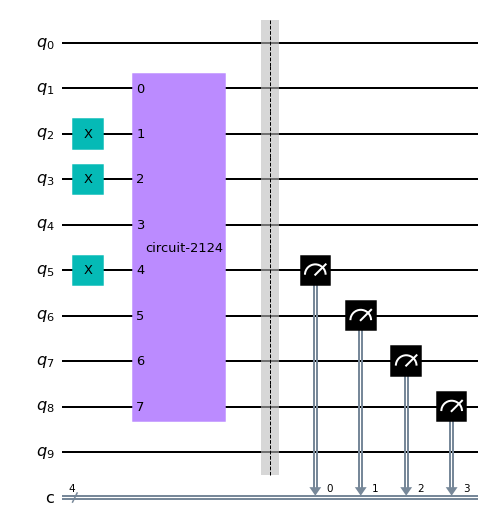

In [337]:
### Start the general circuit
qc = QuantumCircuit(10,4)

### Where the add/sub is going to be located?
Cin = [1]
A = [2,3,4]
B = [5,6,7]
Cout = [8]
register = Cin+A+B+Cout

### Start the add/sub circuit
opt = 0 # 0 for add, 1 for sub
add = total_circuit(Cin, A, B, Cout, opt)

### values to test
# A = 011 = 3
# B = 001 = 1
qc.x([2,3,5])

### Add the add/sub circuit
qc.append(add, register)
qc.barrier()
qc.measure([5,6,7,8],[0,1,2,3])

qc.draw('mpl')

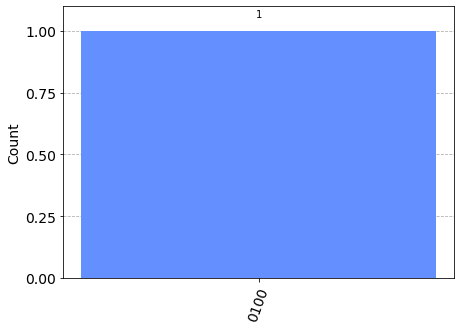

In [338]:
# Simulation
Simulation = Aer.get_backend('qasm_simulator')
Quantum_Transpiler = transpile(qc,Simulation)
Quantum_Obj = assemble(Quantum_Transpiler, shots=1)
Result = Simulation.run(Quantum_Obj).result().get_counts()

plot_histogram(Result)

### Version Information  
Software-Version  
qiskit-0.23.1  
qiskit_aer-0.11.2  
qiskit_optimization-0.4.0  
Python version-3.9.5  
OS-Windows  